In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

In [2]:
a = np.linspace(-1, 1, 101)
b = a[::2].copy()
print(a.shape, b.shape)

(101,) (51,)


In [3]:
c = a[:, np.newaxis] - b ** 2
print(c.shape)

(101, 51)


In [4]:
d = c[np.arange(len(a)-len(b), len(a)), np.arange(len(b))]
print(d.shape)

(51,)


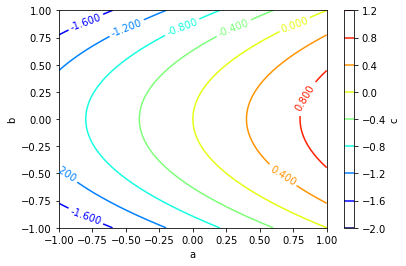

In [5]:
h = plt.contour(a, b, c.transpose(), cmap='jet')
plt.clabel(h)
plt.xlabel('a')
plt.ylabel('b')
plt.colorbar(label='c');

### Question 2

In [6]:
def myfun(t):
    return 10 * np.sin(t) - t ** 2 - 5 * t + 2

In [7]:
xp = np.linspace(-7, 3, 1000)

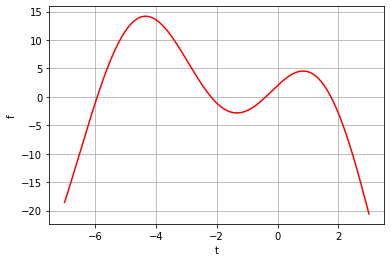

In [8]:
plt.plot(xp, myfun(xp), 'r')
plt.grid()
plt.xlabel('t')
plt.ylabel('f');

In [9]:
from scipy.integrate import quad
int = quad(myfun, -6, 2, epsabs=1e-10)
print(int)

(35.096504565308415, 4.734018840157507e-13)


In [10]:
from scipy.optimize import minimize
res = minimize(lambda t: -myfun(t), -4)
print(res.x, -res.fun)

[-4.33632266] 14.179084379475114


### Question 3

In [11]:
def myser(t, k):
    return pd.Series(t ** k, index=t)

In [12]:
vals = np.arange(1, 31)
a = myser(np.random.choice(vals, size=25, replace=False), 2)
b = myser(np.random.choice(vals, size=25, replace=False), 1)
c = myser(np.random.choice(vals, size=25, replace=False), 0.5)

In [13]:
d = pd.concat((a, b, c), axis=1, join='inner')
print(len(d))

17


In [14]:
d.sort_index(ascending=False, inplace=True)
d.head(1), d.tail(1)

(      0   1         2
 29  841  29  5.385165,
    0  1         2
 3  9  3  1.732051)

### Question 4

In [15]:
dat = pd.read_excel('Glass Identification Data.xlsx', index_col='ID')
dat.head()

,RI,Na,Mg,Al,Si,K,CA,Ba,Fe,Class
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


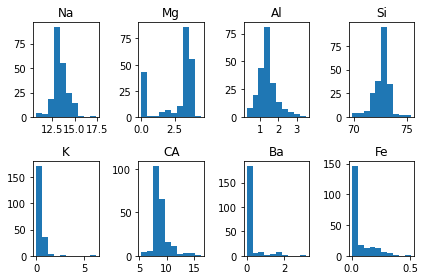

In [16]:
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.hist(dat[dat.columns[i]])
    plt.title(dat.columns[i])
plt.gcf().tight_layout()

In [17]:
# the concentrations are on widely different scales

In [18]:
g = dat.iloc[:, 1:].groupby('Class')
print(g.mean())

              Na        Mg        Al         Si         K         CA  \
Class                                                                  
1      13.242286  3.552429  1.163857  72.619143  0.447429   8.797286   
2      13.111711  3.002105  1.408158  72.598026  0.521053   9.073684   
3      13.437059  3.543529  1.201176  72.404706  0.406471   8.782941   
5      12.827692  0.773846  2.033846  72.366154  1.470000  10.123846   
6      14.646667  1.305556  1.366667  73.206667  0.000000   9.356667   
7      14.442069  0.538276  2.122759  72.965862  0.325172   8.491379   

             Ba        Fe  
Class                      
1      0.012714  0.057000  
2      0.050263  0.079737  
3      0.008824  0.057059  
5      0.187692  0.060769  
6      0.000000  0.000000  
7      1.040000  0.013448  


In [19]:
# variation between glass types is much smaller

In [20]:
import statsmodels.formula.api as smf
res = smf.ols('Mg ~ C(Class)', dat).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     Mg   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     65.54
Date:                Thu, 05 Nov 2020   Prob (F-statistic):           7.28e-41
Time:                        15:16:02   Log-Likelihood:                -280.31
No. Observations:                 214   AIC:                             572.6
Df Residuals:                     208   BIC:                             592.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5524      0.109     32.679

In [21]:
# in this case, there are many significant differences

In [22]:
from scipy import stats
x1 = stats.zscore(dat.iloc[:, 1:-1])

In [23]:
from sklearn.decomposition import PCA
x2 = PCA(n_components=2).fit(x1).transform(x1)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [25]:
nb = GaussianNB()
print(np.mean(cross_val_score(nb, x1, dat.Class)))
print(np.mean(cross_val_score(nb, x2, dat.Class)))

0.33554817275747506
0.5135105204872648


In [26]:
# using the principal components works much better

### Question 5

In [27]:
x = stats.norm.rvs(loc=1, size=100)
y = stats.norm.rvs(loc=0, size=100)

In [28]:
z = x + y
stats.pearsonr(x, z)

(0.717772527887014, 4.3442772678910526e-17)

In [29]:
r = stats.linregress(x, z)
print(r)

LinregressResult(slope=0.9272685717114777, intercept=0.1264083031349167, rvalue=0.717772527887014, pvalue=4.3442772678910335e-17, stderr=0.09086322345374728)


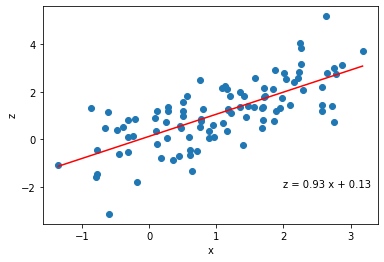

In [30]:
dx = np.array([np.min(x), np.max(x)])
plt.scatter(x, z)
plt.plot(dx, r.slope * dx + r.intercept, 'r')
plt.xlabel('x')
plt.ylabel('z')
plt.text(2, -2, 'z = %.2f x + %.2f' % (r.slope, r.intercept));

In [31]:
print(stats.ttest_ind(x, y))

Ttest_indResult(statistic=7.092866440407539, pvalue=2.2762000488027438e-11)


In [32]:
print(stats.ttest_rel(x, z))

Ttest_relResult(statistic=-0.5275298373462763, pvalue=0.5990059923825717)


In [33]:
# x and y are independent, x and z are not independent (sinze z = x + y)